# Stroke Risk ssessment

# Table of Contents

- [Library import and data loading](##Library-import-and-data-loading)
- [Understandng Data Structure](##Understandng-Data-Structure)
- [Data Cleaning](##Data-Cleaning)
- [Analysis](##Analysis)
- [Conclusion](##Conclusion)

## Library-import-and-data-loading

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

from sklearn.model_selection import train_test_split

In [105]:
df = pd.read_csv("../data/raw.csv")

## Understandng-Data-Structure

In [106]:
# Sampling few rows of data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [107]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [108]:
# checking dimension of data

print(f'There are {df.shape[0]} rows with {df.shape[1]} columns in the data')

There are 5110 rows with 12 columns in the data


## Data-Cleaning

In [109]:
# dropping id column

df.drop('id',axis=1,inplace=True)

In [110]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### There are 201 missing values in the BMI data. Although we can calculate it assuming the height and weight of the persons exist in the data, unfortunately, that is not the case. To fill the missing data, we have a few options. We could replace it with the mean or the median, or group the data set by age and get the mean of each group. Before we make a decision, it's important to explore the Central tendency of the BMI and determine the best course of action for handling the missing value- either by filling it or dropping it.

In [111]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

##### The mean and median values of BMI are quite similar at 28.89 and 28.1, respectively. This indicates that the distribution of BMI values is somewhat symmetrical. It would be reasonable to use the general sample mean for imputation. However, if there are significant variations in BMI based on age groups, group-wise imputation could be considered. Nonetheless, it's worth noting that the variance is 7.84.

In [112]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [113]:
# Check if there are any NaN values in the 'bmi' column after replacement
nan_count_after_replace = df['bmi'].isnull().sum()
print(f"Number of NaN values in BMI column after replacement: {nan_count_after_replace}")

Number of NaN values in BMI column after replacement: 0


## Analysis

In [114]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])  
categorical_data = df.select_dtypes(include=['object'])  

In [115]:
summary_stats = numeric_data.describe()
summary_stats

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [116]:
for column in categorical_data.columns:
    print("==========================")
    print(categorical_data[column].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


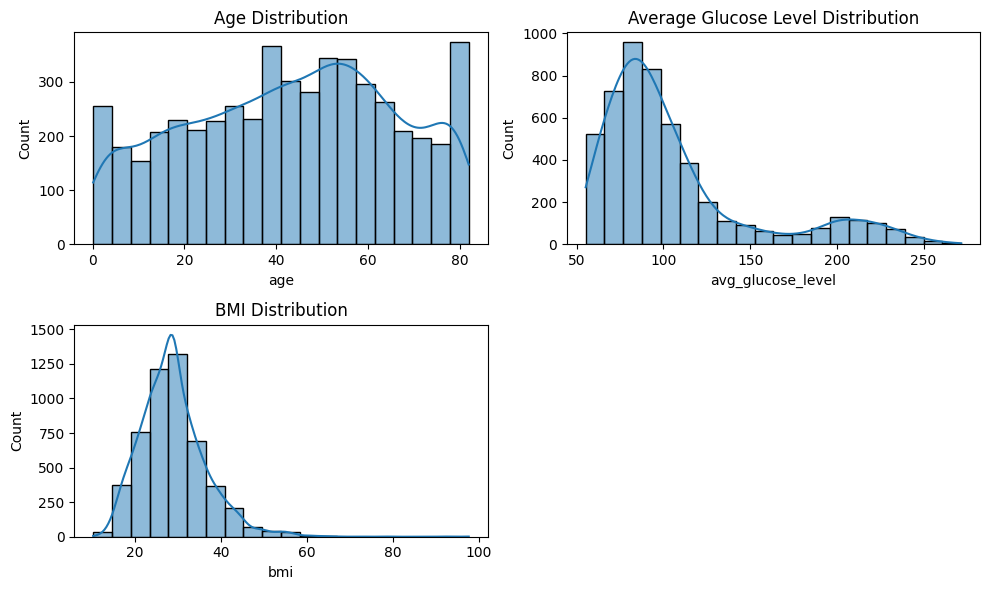

In [117]:
# Histograms for numerical variables
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(numeric_data['age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(numeric_data['avg_glucose_level'], bins=20, kde=True)
plt.title('Average Glucose Level Distribution')

plt.subplot(2, 2, 3)
sns.histplot(numeric_data['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()


##### The age distribution is fairly even, while BMI and glucose levels are skewed to the right.

In [118]:
categorical_columns = categorical_data.select_dtypes(include=['object', 'category'])

categorical_columns

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


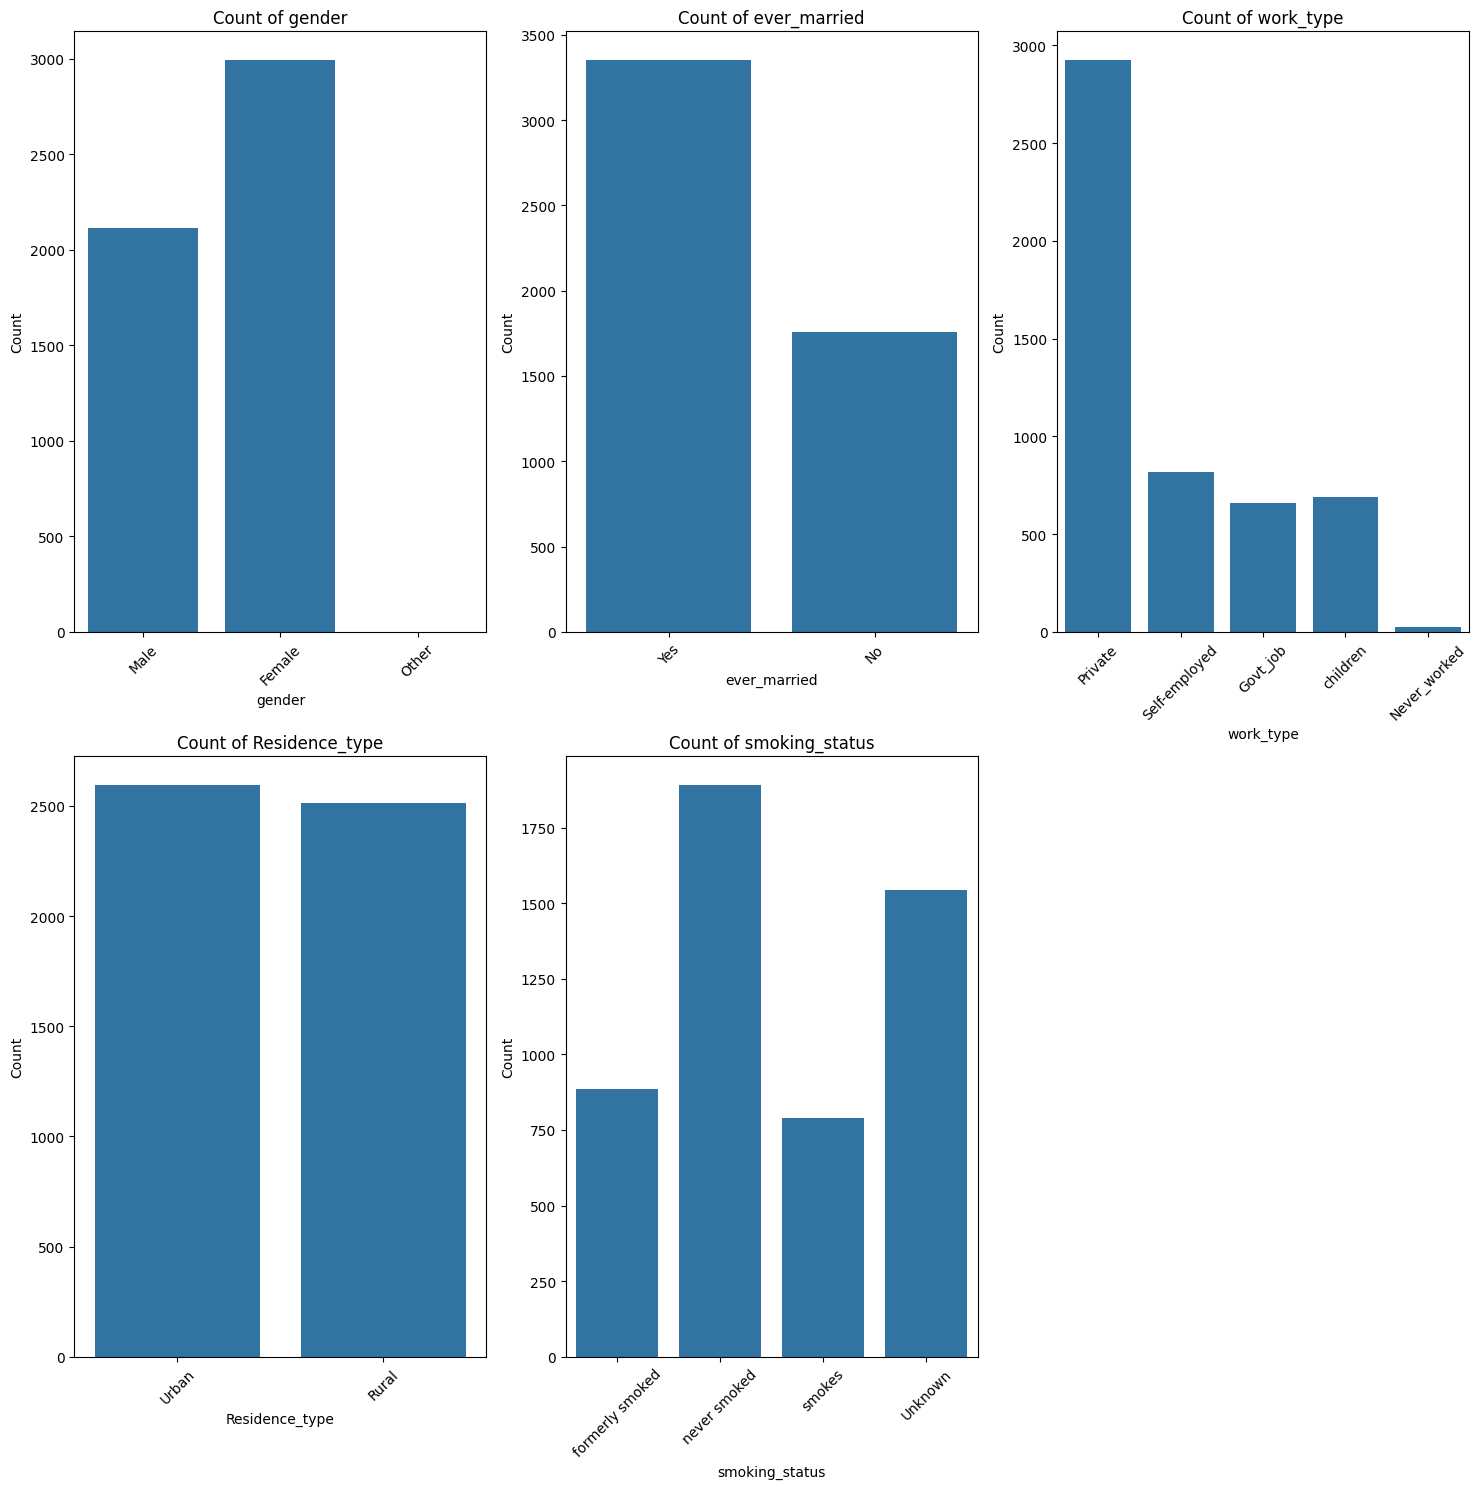

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)  

# Loop through each categorical column and create count plots
for ax, column in zip(axes.flatten(), categorical_columns.columns):
    sns.countplot(x=column, data=categorical_data, ax=ax)
    ax.set_title(f'Count of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  

fig.delaxes(axes.flatten()[-1])

plt.tight_layout()  
plt.show()

### Impact of Variables on Stroke

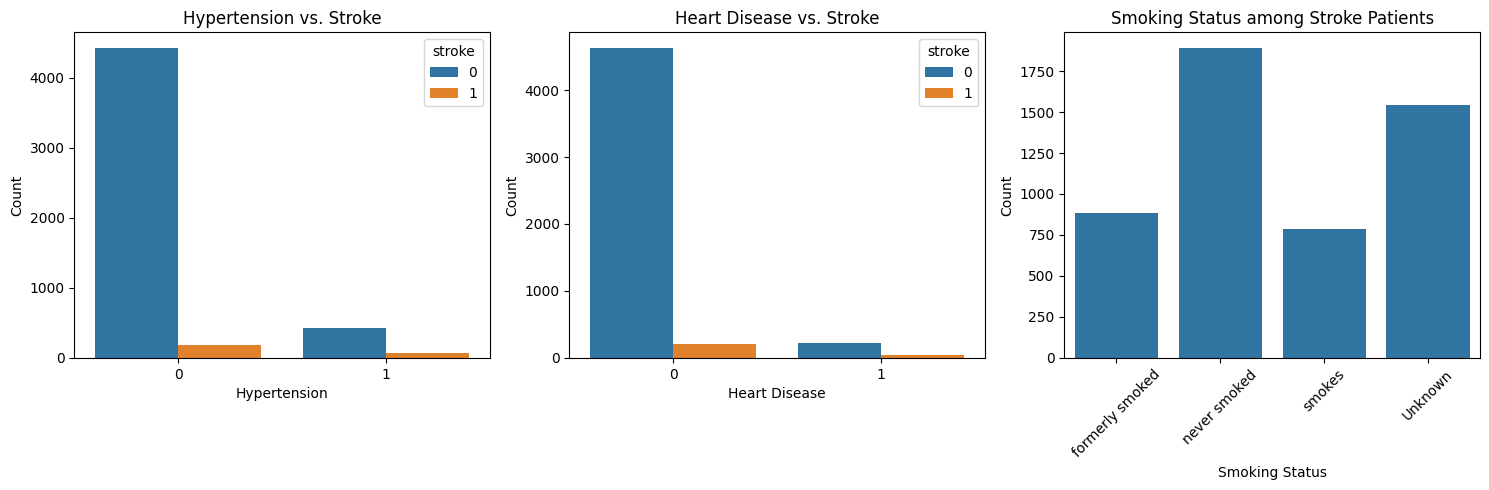

In [120]:
# Analyzing relationships between independent variables and stroke
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='hypertension', hue='stroke', data=numeric_data)
plt.title('Hypertension vs. Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='heart_disease', hue='stroke', data=numeric_data)
plt.title('Heart Disease vs. Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(x='smoking_status', data=categorical_data)
plt.title('Smoking Status among Stroke Patients')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Based on the chart presented above, it seems that having hypertension does not have a significant impact on the likelihood of having a stroke. Similarly, patients with heart disease do not appear to be at a higher risk for stroke, but we cannot draw any definitive conclusions about this hypothesis until we conduct further testing. Visual analysis of charts may indicate certain trends or associations between variables such as hypertension, heart disease, and stroke occurrence, it is important to confirm these findings through rigorous testing and analysis.

### Hypothesis Testing

    Null Hypothesis (H₀): There is no significant association between 'hypertension' and 'stroke' (similarly for 'heart_disease' and 'stroke').
    Alternative Hypothesis (H₁): There is a significant association between 'hypertension' and 'stroke' (and similarly for 'heart_disease' and 'stroke').

In [121]:
# Create contingency tables 
contingency_hypertension_stroke = pd.crosstab(numeric_data['hypertension'], numeric_data['stroke'])
contingency_heart_disease_stroke = pd.crosstab(numeric_data['heart_disease'], numeric_data['stroke'])

# Significance level (alpha)
alpha = 0.05

# Perform chi-square tests
chi2_hypertension, p_val_hypertension, _, _ = chi2_contingency(contingency_hypertension_stroke)
chi2_heart_disease, p_val_heart_disease, _, _ = chi2_contingency(contingency_heart_disease_stroke)

# Print results
print(f"Chi-square Statistic (Hypertension vs. Stroke): {chi2_hypertension}, p-value: {p_val_hypertension}")
print(f"Chi-square Statistic (Heart Disease vs. Stroke): {chi2_heart_disease}, p-value: {p_val_heart_disease}")
print()

if p_val_hypertension < alpha:
    print("Reject Null Hypothesis (H₀)")
    print("There is a significant association between hypertension and stroke.")
else:
    print("Fail to reject Null Hypothesis (H₀)")
    print("There is no significant association between hypertension and stroke.")
    
print("================================================================================================")

if p_val_heart_disease < alpha:
    print("Reject Null Hypothesis (H₀)")
    print("There is a significant association between heart disease and stroke.")
else:
    print("Fail to reject Null Hypothesis (H₀)")
    print("There is no significant association between heart disease and stroke.")


Chi-square Statistic (Hypertension vs. Stroke): 81.6053682482931, p-value: 1.661621901511823e-19
Chi-square Statistic (Heart Disease vs. Stroke): 90.25956125843324, p-value: 2.0887845685229236e-21

Reject Null Hypothesis (H₀)
There is a significant association between hypertension and stroke.
Reject Null Hypothesis (H₀)
There is a significant association between heart disease and stroke.


## Conclusion

It's important to consider the uneven distribution of variables and the presence of outliers when choosing a scaling method for modeling. Certain methods, like variance threshold, are affected by outliers. Additionally, the statistical test shows that `Hypertension` and `Heart Disease` are important factors in determining the outcome of the target variable, `stroke`